In [118]:
!pip install tensorflow==1.15.0

ERROR: Could not find a version that satisfies the requirement tensorflow==1.15.0 (from versions: 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.13.0rc0, 2.13.0rc1)
ERROR: No matching distribution found for tensorflow==1.15.0


In [117]:
# %tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

2.12.0


## Siena Scalp

In [1]:
# !wget -r -N -c -np https://physionet.org/files/siena-scalp-eeg/1.0.0/

# EDA

In [2]:
!pip install pyedflib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 1.9 MB/s eta 0:00:0000:0100:010m


In [3]:
import pyedflib
import numpy as np

# file_name = pyedflib.data.get_generator_filename()
# f = pyedflib.EdfReader(file_name)
# n = f.signals_in_file
# signal_labels = f.getSignalLabels()
# sigbufs = np.zeros((n, f.getNSamples()[0]))
# for i in np.arange(n):
#         sigbufs[i, :] = f.readSignal(i)

In [21]:
# Load the dataset
file_path = '/content/physionet.org/files/siena-scalp-eeg/1.0.0/PN00/PN00-1.edf'
f = pyedflib.EdfReader(file_path)
n_signals = f.signals_in_file
# labels = np.load('siena_scalp_labels.npy')

# Read signals from EDF file
data = np.zeros((n_signals, f.getNSamples()[0]))
for i in range(n_signals):
    data[i, :] = f.readSignal(i)

In [9]:
print(n_signals)

35


In [9]:
# Load the dataset
file_path = '/Users/madhavp/physionet.org/files/chbmit/1.0.0/chb01/chb01_01.edf'
f = pyedflib.EdfReader(file_path)
n_signals = f.signals_in_file
# labels = np.load('siena_scalp_labels.npy')

# Read signals from EDF file
data = np.zeros((n_signals, f.getNSamples()[0]))
for i in range(n_signals):
    data[i, :] = f.readSignal(i)

In [5]:
print(n_signals)

23


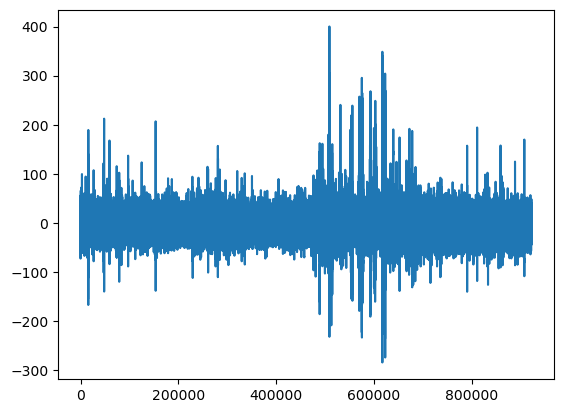

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.plot(data[10,:])

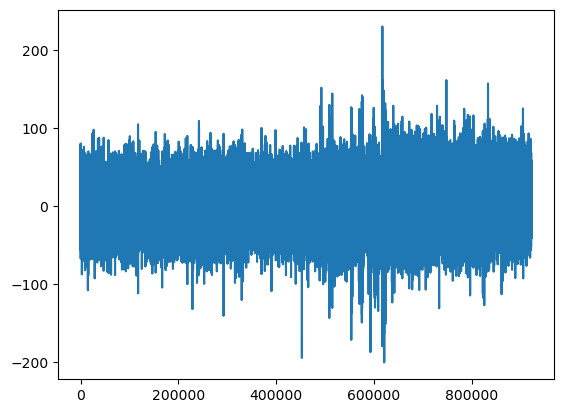

In [10]:
plt.plot(f.readSignal(7))

(100000,)
(921600,)


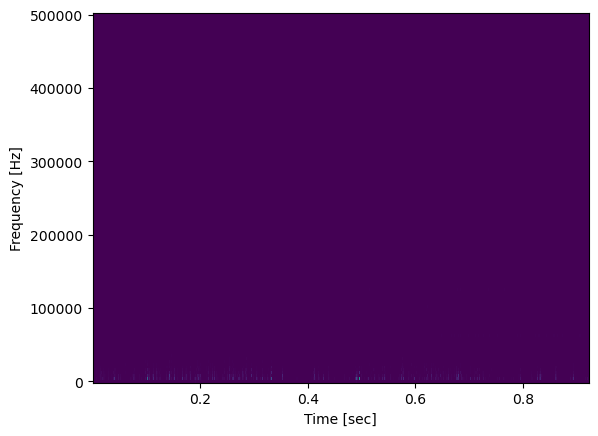

In [6]:
import numpy as np
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt
rng = np.random.default_rng()
import scipy.signal

fs = 10e3
N = 1e5
amp = 2 * np.sqrt(2)
noise_power = 0.01 * fs / 2
time = np.arange(N) / float(fs)
mod = 500*np.cos(2*np.pi*0.25*time)
carrier = amp * np.sin(2*np.pi*3e3*time + mod)
noise = rng.normal(scale=np.sqrt(noise_power), size=time.shape)
noise *= np.exp(-time/5)
x = carrier + noise

print(x.shape)
print(data[20].shape)
f, t, Sxx = signal.spectrogram(x, fs)
f, t, Sxx = signal.spectrogram(data[20], 1e6)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

## CHB-MIT

In [12]:
# !gsutil -m cp -r gs://chbmit-1.0.0.physionet.org DESTINATION

In [11]:
# !wget -r -N -c -np https://physionet.org/files/chbmit/1.0.0/

In [13]:
#Just to see if files got loaded.
file = '/Users/madhavp/physionet.org/files/chbmit/1.0.0/chb01/chb01-summary.txt'
f = open(file, 'r')
file_contents = f.read()
print(file_contents)

Data Sampling Rate: 256 Hz
*************************

Channels in EDF Files:
**********************
Channel 1: FP1-F7
Channel 2: F7-T7
Channel 3: T7-P7
Channel 4: P7-O1
Channel 5: FP1-F3
Channel 6: F3-C3
Channel 7: C3-P3
Channel 8: P3-O1
Channel 9: FP2-F4
Channel 10: F4-C4
Channel 11: C4-P4
Channel 12: P4-O2
Channel 13: FP2-F8
Channel 14: F8-T8
Channel 15: T8-P8
Channel 16: P8-O2
Channel 17: FZ-CZ
Channel 18: CZ-PZ
Channel 19: P7-T7
Channel 20: T7-FT9
Channel 21: FT9-FT10
Channel 22: FT10-T8
Channel 23: T8-P8

File Name: chb01_01.edf
File Start Time: 11:42:54
File End Time: 12:42:54
Number of Seizures in File: 0

File Name: chb01_02.edf
File Start Time: 12:42:57
File End Time: 13:42:57
Number of Seizures in File: 0

File Name: chb01_03.edf
File Start Time: 13:43:04
File End Time: 14:43:04
Number of Seizures in File: 1
Seizure Start Time: 2996 seconds
Seizure End Time: 3036 seconds

File Name: chb01_04.edf
File Start Time: 14:43:12
File End Time: 15:43:12
Number of Seizures in File: 1
S

/Users/madhavp/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


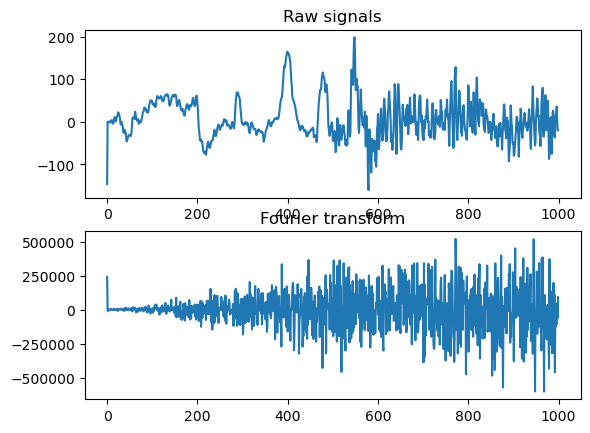

In [14]:
# Just to check if things are syncing in.
from pyedflib import highlevel
import numpy as np
import matplotlib.pyplot as plt

# read an edf file
file2 = '/Users/madhavp/physionet.org/files/chbmit/1.0.0/chb01/chb01_01.edf'
# file2 = '/content/physionet.org/files/siena-scalp-eeg/1.0.0/PN00/PN00-1.edf'
signals, signal_headers, header = highlevel.read_edf(file2)

dft = np.fft.fft(signals, axis=1)

plt.subplot(2,1,1)
plt.plot(np.transpose(signals[0,:1000]))
plt.title('Raw signals')
plt.subplot(2,1,2)
plt.plot(np.transpose(dft[0,:1000]))
plt.title('Fourier transform')
plt.show()

In [15]:
print(signal_headers)

[{'label': 'FP1-F7', 'dimension': 'uV', 'sample_rate': 256.0, 'sample_frequency': 256.0, 'physical_max': 800.0, 'physical_min': -800.0, 'digital_max': 2047, 'digital_min': -2048, 'prefilter': '', 'transducer': ''}, {'label': 'F7-T7', 'dimension': 'uV', 'sample_rate': 256.0, 'sample_frequency': 256.0, 'physical_max': 800.0, 'physical_min': -800.0, 'digital_max': 2047, 'digital_min': -2048, 'prefilter': '', 'transducer': ''}, {'label': 'T7-P7', 'dimension': 'uV', 'sample_rate': 256.0, 'sample_frequency': 256.0, 'physical_max': 800.0, 'physical_min': -800.0, 'digital_max': 2047, 'digital_min': -2048, 'prefilter': '', 'transducer': ''}, {'label': 'P7-O1', 'dimension': 'uV', 'sample_rate': 256.0, 'sample_frequency': 256.0, 'physical_max': 800.0, 'physical_min': -800.0, 'digital_max': 2047, 'digital_min': -2048, 'prefilter': '', 'transducer': ''}, {'label': 'FP1-F3', 'dimension': 'uV', 'sample_rate': 256.0, 'sample_frequency': 256.0, 'physical_max': 800.0, 'physical_min': -800.0, 'digital_ma

In [113]:

import os

path = '/Users/madhavp/physionet.org/files/chbmit/1.0.0'
# path = '/content/physionet.org/files/siena-scalp-eeg/1.0.0'

edfFiles = []
txtFiles = []
# r=root, d=directories, f = files
for r, d, f in os.walk(path):
    for file in f:
        if file[-4:] == '.edf':
            edfFiles.append(os.path.join(r, file))
        elif file[-4:] == '.txt':
            txtFiles.append(os.path.join(r, file))

edfFiles = sorted(edfFiles)
txtFiles = sorted(txtFiles)

for f in edfFiles:
    print(f)

for f in txtFiles:
    print(f)

/Users/madhavp/physionet.org/files/chbmit/1.0.0/chb01/chb01_01.edf
/Users/madhavp/physionet.org/files/chbmit/1.0.0/chb01/chb01_02.edf
/Users/madhavp/physionet.org/files/chbmit/1.0.0/chb01/chb01_03.edf
/Users/madhavp/physionet.org/files/chbmit/1.0.0/chb01/chb01_04.edf
/Users/madhavp/physionet.org/files/chbmit/1.0.0/chb01/chb01_05.edf
/Users/madhavp/physionet.org/files/chbmit/1.0.0/chb01/chb01_06.edf
/Users/madhavp/physionet.org/files/chbmit/1.0.0/chb01/chb01_07.edf
/Users/madhavp/physionet.org/files/chbmit/1.0.0/chb01/chb01_08.edf
/Users/madhavp/physionet.org/files/chbmit/1.0.0/chb01/chb01_09.edf
/Users/madhavp/physionet.org/files/chbmit/1.0.0/chb01/chb01_10.edf
/Users/madhavp/physionet.org/files/chbmit/1.0.0/chb01/chb01_11.edf
/Users/madhavp/physionet.org/files/chbmit/1.0.0/chb01/chb01_12.edf
/Users/madhavp/physionet.org/files/chbmit/1.0.0/chb01/chb01_13.edf
/Users/madhavp/physionet.org/files/chbmit/1.0.0/chb01/chb01_14.edf
/Users/madhavp/physionet.org/files/chbmit/1.0.0/chb01/chb01_15

In [154]:
import os
import mne

path = '/Users/madhavp/physionet.org/files/chbmit/1.0.0'
# path = '/content/physionet.org/files/siena-scalp-eeg/1.0.0'

edfFiles = []
txtFiles = []
# r=root, d=directories, f=files
for r, d, f in os.walk(path):
    for file in f:
        if file.endswith('.edf'):
            edfFiles.append(os.path.join(r, file))
        elif file.endswith('.txt'):
            txtFiles.append(os.path.join(r, file))

edfFiles = sorted(edfFiles)
txtFiles = sorted(txtFiles)

for edf_file, txt_file in zip(edfFiles, txtFiles):
    raw = mne.io.read_raw_edf(edf_file)
    csv_file = os.path.splitext(edf_file)[0] + '.csv'
    raw.to_data_frame().to_csv(csv_file, index=False)
    print(f"Converted {edf_file} to {csv_file}")


Extracting EDF parameters from /Users/madhavp/physionet.org/files/chbmit/1.0.0/chb01/chb01_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/var/folders/fz/6jhdkfr50zg8znkw9c7rz0gm0000gn/T/ipykernel_11354/1681911310.py:21: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(edf_file)


Converted /Users/madhavp/physionet.org/files/chbmit/1.0.0/chb01/chb01_01.edf to /Users/madhavp/physionet.org/files/chbmit/1.0.0/chb01/chb01_01.csv
Extracting EDF parameters from /Users/madhavp/physionet.org/files/chbmit/1.0.0/chb01/chb01_02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/var/folders/fz/6jhdkfr50zg8znkw9c7rz0gm0000gn/T/ipykernel_11354/1681911310.py:21: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(edf_file)


Converted /Users/madhavp/physionet.org/files/chbmit/1.0.0/chb01/chb01_02.edf to /Users/madhavp/physionet.org/files/chbmit/1.0.0/chb01/chb01_02.csv
Extracting EDF parameters from /Users/madhavp/physionet.org/files/chbmit/1.0.0/chb01/chb01_03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/var/folders/fz/6jhdkfr50zg8znkw9c7rz0gm0000gn/T/ipykernel_11354/1681911310.py:21: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(edf_file)


Converted /Users/madhavp/physionet.org/files/chbmit/1.0.0/chb01/chb01_03.edf to /Users/madhavp/physionet.org/files/chbmit/1.0.0/chb01/chb01_03.csv
Extracting EDF parameters from /Users/madhavp/physionet.org/files/chbmit/1.0.0/chb01/chb01_04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/var/folders/fz/6jhdkfr50zg8znkw9c7rz0gm0000gn/T/ipykernel_11354/1681911310.py:21: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(edf_file)


Converted /Users/madhavp/physionet.org/files/chbmit/1.0.0/chb01/chb01_04.edf to /Users/madhavp/physionet.org/files/chbmit/1.0.0/chb01/chb01_04.csv
Extracting EDF parameters from /Users/madhavp/physionet.org/files/chbmit/1.0.0/chb01/chb01_05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/var/folders/fz/6jhdkfr50zg8znkw9c7rz0gm0000gn/T/ipykernel_11354/1681911310.py:21: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(edf_file)


Converted /Users/madhavp/physionet.org/files/chbmit/1.0.0/chb01/chb01_05.edf to /Users/madhavp/physionet.org/files/chbmit/1.0.0/chb01/chb01_05.csv
Extracting EDF parameters from /Users/madhavp/physionet.org/files/chbmit/1.0.0/chb01/chb01_06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/var/folders/fz/6jhdkfr50zg8znkw9c7rz0gm0000gn/T/ipykernel_11354/1681911310.py:21: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(edf_file)


Converted /Users/madhavp/physionet.org/files/chbmit/1.0.0/chb01/chb01_06.edf to /Users/madhavp/physionet.org/files/chbmit/1.0.0/chb01/chb01_06.csv


In [153]:
import numpy as np
import mne
edf = mne.io.read_raw_edf('/Users/madhavp/physionet.org/files/chbmit/1.0.0/chb01/chb01_01.edf')
header = ','.join(edf.ch_names)
np.savetxt('/Users/madhavp/physionet.org/files/chbmit/1.0.0/chb01/chb01_01.edf.csv', edf.get_data().T, delimiter=',', header=header)


Extracting EDF parameters from /Users/madhavp/physionet.org/files/chbmit/1.0.0/chb01/chb01_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/var/folders/fz/6jhdkfr50zg8znkw9c7rz0gm0000gn/T/ipykernel_11354/933451540.py:3: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  edf = mne.io.read_raw_edf('/Users/madhavp/physionet.org/files/chbmit/1.0.0/chb01/chb01_01.edf')


In [59]:
edfFileName = '/Users/madhavp/physionet.org/files/chbmit/1.0.0/chb01/chb01_03.edf'
sub = edfFileName[54:59]
filePath = '/Users/madhavp/physionet.org/files/chbmit/1.0.0/' + sub + '/' + sub + '-summary.txt'
#   filepath = '/content/physionet.org/files/siena-scalp-eeg/1.0.0'+ sub + '/' + sub + '-summary.txt'
f = open(filePath, 'r')
file_contents = f.read()

file_list = file_contents.split('\n')
sub = edfFileName[54:-4]
sub = 'File Name: ' + sub + '.edf'
ind = file_list.index(sub)

seizures = list(map(int, re.findall(r'\d+', file_list[ind+3]) ))[0]
start = []
end   = []
for i in range(seizures):
    start.append(list(map(int, re.findall(r'\d+', file_list[ind+2*i+4])))[0])
    end.append(list(map(int, re.findall(r'\d+', file_list[ind+2*i+5])))[0])
# print(start, end)

if seizures == 0:
    labels = np.zeros((3600))
else:
    labels = np.ones((3600))
    labels[end[-1]:] *= 0
    for i in range(len(start)):
      labels[start[i]:end[i]] *= 2


In [115]:
print(seizures)
print(start)
print(end)
print(labels.size)

1
[2996]
[3036]
3600


In [147]:
from pyedflib import highlevel
import numpy as np
import matplotlib.pyplot as plt
import re
import matplotlib.pyplot as plt


def get_summary_file_contents(edfFileName):
    sub = edfFileName[54:59]
    filePath = '/Users/madhavp/physionet.org/files/chbmit/1.0.0/' + sub + '/' + sub + '-summary.txt'
    with open(filePath, 'r') as f:
        file_contents = f.read()
    return file_contents

def extract_labels(file_contents, edfFileName):
    sub = edfFileName[54:-4]
    sub = 'File Name: ' + sub + '.edf'
    ind = file_contents.index(sub)

    seizures = list(map(int, re.findall(r'\d+', file_contents[ind+3])))[0]
    start = []
    end = []
    for i in range(seizures):
        start.append(list(map(int, re.findall(r'\d+', file_contents[ind+2*i+4])))[0])
        end.append(list(map(int, re.findall(r'\d+', file_contents[ind+2*i+5])))[0])

    if seizures == 0:
        labels = np.zeros((3600))
    else:
        labels = np.ones((3600))
        labels[end[-1]:] *= 0
        for i in range(len(start)):
            labels[start[i]:end[i]] *= 2

    return labels

def generateLabels(edfFileName):
    file_contents = get_summary_file_contents(edfFileName)
    labels = extract_labels(file_contents, edfFileName)
    return labels



# def generateLabels(edfFileName):
#   # sub = edfFileName[48:53]
#   sub = edfFileName[54:59]
#   filePath = '/Users/madhavp/physionet.org/files/chbmit/1.0.0/' + sub + '/' + sub + '-summary.txt'
# #   filepath = '/content/physionet.org/files/siena-scalp-eeg/1.0.0'+ sub + '/' + sub + '-summary.txt'
#   f = open(filePath, 'r')
#   file_contents = f.read()

#   file_list = file_contents.split('\n')
#   sub = edfFileName[54:-4]
#   sub = 'File Name: ' + sub + '.edf'
#   ind = file_list.index(sub)

#   seizures = list(map(int, re.findall(r'\d+', file_list[ind+3]) ))[0]
#   start = []
#   end   = []
#   for i in range(seizures):
#     start.append(list(map(int, re.findall(r'\d+', file_list[ind+2*i+4])))[0])
#     end.append(list(map(int, re.findall(r'\d+', file_list[ind+2*i+5])))[0])
#     # print(start, end)

#   if seizures == 0:
#     labels = np.zeros((3600))
#   else:
#     labels = np.ones((3600))
#     labels[end[-1]:] *= 0
#     for i in range(len(start)):
#       labels[start[i]:end[i]] *= 2
  
#   return labels

In [148]:
import random

totalData       = len(edfFiles)
# random.shuffle(edfFiles)
partition       = int(len(edfFiles) * 2/3)
edfFilesVal     = edfFiles[partition:]
edfFilesTrain   = edfFiles[:partition]
trainData       = len(edfFilesTrain)
valData         = len(edfFilesVal)

print(totalData, trainData, valData)

188 125 63


In [149]:
print(edfFilesTrain)

['/Users/madhavp/physionet.org/files/chbmit/1.0.0/chb01/chb01_01.edf', '/Users/madhavp/physionet.org/files/chbmit/1.0.0/chb01/chb01_02.edf', '/Users/madhavp/physionet.org/files/chbmit/1.0.0/chb01/chb01_03.edf', '/Users/madhavp/physionet.org/files/chbmit/1.0.0/chb01/chb01_04.edf', '/Users/madhavp/physionet.org/files/chbmit/1.0.0/chb01/chb01_05.edf', '/Users/madhavp/physionet.org/files/chbmit/1.0.0/chb01/chb01_06.edf', '/Users/madhavp/physionet.org/files/chbmit/1.0.0/chb01/chb01_07.edf', '/Users/madhavp/physionet.org/files/chbmit/1.0.0/chb01/chb01_08.edf', '/Users/madhavp/physionet.org/files/chbmit/1.0.0/chb01/chb01_09.edf', '/Users/madhavp/physionet.org/files/chbmit/1.0.0/chb01/chb01_10.edf', '/Users/madhavp/physionet.org/files/chbmit/1.0.0/chb01/chb01_11.edf', '/Users/madhavp/physionet.org/files/chbmit/1.0.0/chb01/chb01_12.edf', '/Users/madhavp/physionet.org/files/chbmit/1.0.0/chb01/chb01_13.edf', '/Users/madhavp/physionet.org/files/chbmit/1.0.0/chb01/chb01_14.edf', '/Users/madhavp/phy

In [155]:
stackedLabels = np.zeros((1))
for f in edfFilesTrain:
    genLabels = generateLabels(f)
    stackedLabels = np.concatenate((stackedLabels, genLabels), axis=-1)
print(stackedLabels)

IndexError: list index out of range

### Frequency domain

In [144]:

# from keras.utils import to_categorical

# def stackDFTTrain(nbatch = 2):
#   count = 0

#   stackedDFT = np.zeros((1, 23, 256, 3))
#   stackedLabels = np.zeros((1))
#   rejected   = []

#   while True:
#     for f in edfFilesTrain:
#       # print(f[54:-4])
#       if stackedDFT.shape[0] >= nbatch*3600//3 + 1:
#         print(stackedLabels.shape)
#         if stackedDFT[1:nbatch*3600//3 + 1,:,:,:].shape == (3600*nbatch//3, 23, 256, 3) and to_categorical(stackedLabels[1:nbatch*3600//3 + 1], num_classes=3).shape == (3600*nbatch//3, 3):
#           yield (stackedDFT[1:nbatch*3600//3 + 1,:,:,:],
#                  to_categorical(stackedLabels[1:nbatch*3600//3 + 1], num_classes=3))
#         stackedDFT = stackedDFT[nbatch*3600//3:,:,:,:]
#         stackedLabels = stackedLabels[nbatch*3600:]
#         print('extra', stackedDFT.shape, stackedLabels.shape)

#       signals, signal_headers, header = highlevel.read_edf(f)
#       if signals.shape[-1] % 3600 != 0 or signals.shape[0] != 23:
#         rejected.append(f[54:59])
#         continue
      
#       # if signals.shape != (23, 921600):
#       #   rejected.append(f[54:59])
#       #   continue

#       count += 1
#       print(f, signals.shape)
#       s = int(signals.shape[1]/256)
#       signals = np.reshape(signals, (23,256,3,s//3))
#       signals = signals.transpose(3,0,1,2)
#       stackedDFT = np.concatenate((stackedDFT, np.fft.fft(signals, axis=1)), axis=0)
#       genLabels = generateLabels(f)
#       stackedLabels = np.concatenate((stackedLabels, genLabels), axis=-1)
    
    
import tensorflow as tf
from tensorflow.keras.utils import to_categorical


def stackDFTTrain(nbatch=2):
    count = 0

    stackedDFT = tf.zeros((1, 23, 256, 3), dtype=tf.complex64)
    stackedLabels = tf.zeros((1))
    rejected = []

    while True:
        for f in edfFilesTrain:
            if stackedDFT.shape[0] >= nbatch * 3600 // 3 + 1:
                print(stackedLabels.shape)
                if (
                    stackedDFT[1 : nbatch * 3600 // 3 + 1, :, :, :].shape
                    == (3600 * nbatch // 3, 23, 256, 3)
                    and to_categorical(
                        stackedLabels[1 : nbatch * 3600 // 3 + 1],
                        num_classes=3,
                    ).shape
                    == (3600 * nbatch // 3, 3)
                ):
                    return (
                        stackedDFT[1 : nbatch * 3600 // 3 + 1, :, :, :],
                        to_categorical(
                            stackedLabels[1 : nbatch * 3600 // 3 + 1],
                            num_classes=3,
                        ),
                    )
                stackedDFT = stackedDFT[nbatch * 3600 // 3 :, :, :, :]
                stackedLabels = stackedLabels[nbatch * 3600 :]
                print("extra", stackedDFT.shape, stackedLabels.shape)

            signals, signal_headers, header = highlevel.read_edf(f)
            if (
                signals.shape[-1] % 3600 != 0
                or signals.shape[0] != 23
            ):
                rejected.append(f[54:59])
                continue

            count += 1
            print(f, signals.shape)
            s = int(signals.shape[1] / 256)
            signals = tf.reshape(signals, (23, 256, 3, s // 3))
            signals = tf.transpose(signals, (3, 0, 1, 2))
            signals = tf.complex(signals, tf.zeros_like(signals))  # Convert to complex64 data type
            stackedDFT = tf.concat(
                (stackedDFT, tf.cast(tf.signal.fft(signals), tf.complex64)), axis=0
            )
            genLabels = generateLabels(f)  # Update this based on your implementation
            stackedLabels = tf.concat(
                (stackedLabels, genLabels), axis=-1
            )

            
            
def stackDFTVal(nbatch=1):
    count = 0

    stackedDFT = tf.zeros((1, 23, 256, 3))
    stackedLabels = tf.zeros((1))
    rejected = []
  
    while True:
        for f in edfFilesVal:
            if stackedDFT.shape[0] >= nbatch * 3600 // 3 + 1:
                if (
                    stackedDFT[1 : nbatch * 3600 // 3 + 1, :, :, :].shape
                    == (3600 * nbatch // 3, 23, 256, 3)
                    and tf.keras.utils.to_categorical(
                        stackedLabels[1 : nbatch * 3600 // 3 + 1],
                        num_classes=3,
                    ).shape
                    == (3600 * nbatch // 3, 3)
                ):
                    return (
                        stackedDFT[1 : nbatch * 3600 // 3 + 1, :, :, :],
                        tf.keras.utils.to_categorical(
                            stackedLabels[1 : nbatch * 3600 // 3 + 1],
                            num_classes=3,
                        ),
                    )
                stackedDFT = stackedDFT[nbatch * 3600 // 3 :, :, :, :]
                stackedLabels = stackedLabels[nbatch * 3600 :]

            signals, signal_headers, header = highlevel.read_edf(f)
            if (
                signals.shape[-1] % 3600 != 0
                or signals.shape[0] != 23
            ):
                rejected.append(f[54:59])
                continue

            count += 1
            print(f, signals.shape)
            s = int(signals.shape[1] / 256)
            signals = tf.reshape(signals, (23, 256, 3, s // 3))
            signals = tf.transpose(signals, (3, 0, 1, 2))
            stackedDFT = tf.concat(
                (stackedDFT, tf.signal.fft(signals)), axis=0
            )
            genLabels = generateLabels(f)  # Update this based on your implementation
            stackedLabels = tf.concat(
                (stackedLabels, genLabels), axis=-1
            )


# for h in stackDFTVal():
#   print(len(h), h[0].shape, h[1].shape)
#   break

### Time Domain

In [140]:
from keras.utils import to_categorical

def stackTimeTrain(nbatch = 2):
  count = 0

  stackedDFT = np.zeros((1, 23, 256, 3))
  stackedLabels = np.zeros((1))
  rejected   = []

  while True:
    for f in edfFilesTrain:
      # print(f[54:-4])
      if stackedDFT.shape[0] >= nbatch*3600//3 + 1:
        print(stackedLabels.shape)
        if stackedDFT[1:nbatch*3600//3 + 1,:,:,:].shape == (3600*nbatch//3, 23, 256, 3) and to_categorical(stackedLabels[1:nbatch*3600//3 + 1], num_classes=3).shape == (3600*nbatch//3, 3):
          yield (stackedDFT[1:nbatch*3600//3 + 1,:,:,:],
                 to_categorical(stackedLabels[1:nbatch*3600//3 + 1], num_classes=3))
        stackedDFT = stackedDFT[nbatch*3600//3:,:,:,:]
        stackedLabels = stackedLabels[nbatch*3600:]
        print('extra', stackedDFT.shape, stackedLabels.shape)

      signals, signal_headers, header = highlevel.read_edf(f)
      if signals.shape[-1] % 3600 != 0 or signals.shape[0] != 23:
        rejected.append(f[54:59])
        continue
      
      # if signals.shape != (23, 921600):
      #   rejected.append(f[54:59])
      #   continue

      count += 1
      print(f, signals.shape)
      s = int(signals.shape[1]/256)
      signals = np.reshape(signals, (23,256,3,s//3))
      signals = signals.transpose(3,0,1,2)
      stackedDFT = np.concatenate((stackedDFT, signals), axis=0)
      genLabels = generateLabels(f)
      stackedLabels = np.concatenate((stackedLabels, genLabels), axis=-1)
    
    

def stackTimeVal(nbatch = 1):
  count = 0

  stackedDFT = np.zeros((1, 23, 256, 3))
  stackedLabels = np.zeros((1))
  rejected   = []

  while True:
    for f in edfFilesTrain:
      # print(f[54:-4])
      if stackedDFT.shape[0] >= nbatch*3600//3 + 1:
        print(stackedLabels.shape)
        if stackedDFT[1:nbatch*3600//3 + 1,:,:,:].shape == (3600*nbatch//3, 23, 256, 3) and to_categorical(stackedLabels[1:nbatch*3600//3 + 1], num_classes=3).shape == (3600*nbatch//3, 3):
          yield (stackedDFT[1:nbatch*3600//3 + 1,:,:,:],
                 to_categorical(stackedLabels[1:nbatch*3600//3 + 1], num_classes=3))
        stackedDFT = stackedDFT[nbatch*3600//3:,:,:,:]
        stackedLabels = stackedLabels[nbatch*3600:]
        print('extra', stackedDFT.shape, stackedLabels.shape)

      signals, signal_headers, header = highlevel.read_edf(f)
      if signals.shape[-1] % 3600 != 0 or signals.shape[0] != 23:
        rejected.append(f[54:59])
        continue
      
      # if signals.shape != (23, 921600):
      #   rejected.append(f[54:59])
      #   continue

      count += 1
      print(f, signals.shape)
      s = int(signals.shape[1]/256)
      signals = np.reshape(signals, (23,256,3,s//3))
      signals = signals.transpose(3,0,1,2)
      stackedDFT = np.concatenate((stackedDFT, signals), axis=0)
      genLabels = generateLabels(f)
      stackedLabels = np.concatenate((stackedLabels, genLabels), axis=-1)
     

### Callback class

In [141]:

import tensorflow as tf
from tensorflow.keras.callbacks import Callback

# when accuracy reaches ACCURACY_THRESHOLD
ACCURACY_THRESHOLD = 0.95

class myCallback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > ACCURACY_THRESHOLD:
            print("\nReached %2.2f%% accuracy, so stopping training!!" % (ACCURACY_THRESHOLD * 100))
            self.model.stop_training = True

# Instantiate a callback object
callbacks = myCallback()


### Model

In [145]:

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Dropout, AveragePooling2D
from tensorflow.keras.utils import to_categorical

nBatch = 2

in1 = Input(shape=(23, 256, 3))
c1 = Conv2D(16, (5,5), activation='relu')(in1)
m1 = AveragePooling2D()(c1)
fl = Flatten()(m1)
o = Dense(3, activation='sigmoid')(fl)

model = Model(inputs=in1, outputs=o)
print(model.summary())


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 23, 256, 3)]      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 19, 252, 16)       1216      
                                                                 
 average_pooling2d_5 (Averag  (None, 9, 126, 16)       0         
 ePooling2D)                                                     
                                                                 
 flatten_5 (Flatten)         (None, 18144)             0         
                                                                 
 dense_5 (Dense)             (None, 3)                 54435     
                                                                 
Total params: 55,651
Trainable params: 55,651
Non-trainable params: 0
_______________________________________________________

In [146]:


import tensorflow as tf
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import CategoricalCrossentropy

model.compile(
    optimizer=SGD(),
    loss=CategoricalCrossentropy(),
    metrics=['accuracy']
)

testSteps = int(trainData / (16 * 8))
valSteps = int(valData / 16)
history_cnn = model.fit(
    stackDFTTrain(),
    epochs=1,
    validation_data=stackDFTVal()
    # callbacks=[callbacks]
)


/Users/madhavp/physionet.org/files/chbmit/1.0.0/chb01/chb01_01.edf (23, 921600)
/Users/madhavp/physionet.org/files/chbmit/1.0.0/chb01/chb01_02.edf (23, 921600)
(7201,)


KeyboardInterrupt: 